In [1]:
# In this notebook: 
# 1) We make predictions regarding the sentiment of each tweet based on the classifier
# 2) We create an analysis and visualization

In [49]:
from IPython.display import HTML; HTML('''<script> code_shown=true;function code_toggle() {if (code_shown){$('div.input').hide();$('#toggleButton').val('Show Code')} else {$('div.input').show();$('#toggleButton').val('Hide Code')}code_shown = !code_shown}$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" id="toggleButton"></form>''')# <a href="javascript:code_toggle()">click to unhide code</a>

In [50]:
# import the libraries

import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# print non truncated column info in pandas dataframe
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

## - Read the preprocessed tweets & make predictions (probabilistic classification)

In [53]:
# read the pickle file that was created in lexiconsTofeatures
df_tweets = pd.read_pickle('.../results/df_final2_v1.pkl')

In [56]:
features = ['N_exclam',
       'has_url', 'N_hash', 'N_mentions', 'N_uppers', 'N_words', 'Sum_subj', 'Sum_positive', 'Sum_negative',
       'Sum_anger', 'Sum_disgust', 'Sum_fear', 'Sum_happy', 'Sum_sad',
       'Sum_surprise', 'N_Uni_Neg', 'Score_Uni_Neg', 'N_Uni_Pos',
       'Score_Uni_Pos', 'N_Bi_Neg', 'Score_Bi_Neg', 'N_Bi_Pos', 'Score_Bi_Pos',
       'Score_Uni', 'Score_Bi', 'N_verbs', 'N_adjs', 'N_nouns']

X = df_tweets[features]

In [57]:
# load the saved model
filename = '.../models/clf.sav'
clf = pickle.load(open(filename, 'rb'))

In [58]:
# predict the class of each row
predictions_class = clf.predict(X)
# predict the propability for each class
predictions_proba = clf.predict_proba(X)

In [59]:
# create a dataframe with the tweets of the testset and the probabilities + predictions + actuals
headers = ['Neg', 'Neut', 'Pos']
df = pd.DataFrame(predictions_proba, columns=headers)
# add column with the predicted class for each tweet
df['Prediction'] = predictions_class

In [60]:
df.head(1)

Neg   Neut    Pos  Prediction
0  0.79  0.164  0.046 -1

In [61]:
# create a dataframe with the above predictions and the details of each tweet
# 'perifereia'
df_tweets2 = df_tweets[['date', 'hashtags', 'id', 'searchParam', 'text', 'user_id', 'user_name','Bigrams2']]
df_tweets2 = pd.concat([df_tweets2, df], axis=1)

In [62]:
# drop some tweets that appear to be exactly the same
df_tweets2 = df_tweets2.drop_duplicates(subset=['id', 'searchParam', 'user_id'], keep='first')

In [63]:
df_tweets2.head(3)

date                                               hashtags  \
0 2019-09-08 23:39:53  []                                                      
1 2019-09-08 22:46:36  [ŒùŒî, ŒïœÄŒπœÑŒµŒªŒπŒ∫œå_Œ∫œÅŒ¨œÑŒøœÇ, ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑, ŒîŒïŒò2019, ŒíŒµŒªŒªŒπŒ¥ŒµŒπŒø]   
2 2019-09-08 22:44:10  [Œ°Œ±Œ≥Œ∫ŒøœçœÉŒ∑œÇ, ŒùŒî]                                         

                    id searchParam  \
0  1170844235215642624  #ŒùŒî          
1  1170830825153318912  #ŒùŒî          
2  1170830212986232832  #ŒùŒî          

                                                                                                                                                                                                                                                                                                            text  \
0  RT @EliasPalai: Œ†œÅœåŒ∏ŒµœÉŒ∑ Œ®ŒÆœÜŒøœÖ ŒïŒ∏ŒΩŒπŒ∫œéŒΩ ŒïŒ∫ŒªŒøŒ≥œéŒΩ\n\n(ŒöŒ±Œπ Œ∫Œ¨œÑŒøŒπŒ∫ŒøŒπ œÑŒøœÖ ŒïŒæœâœÑŒµœÅŒπŒ∫Œøœç Œ±œÜŒøœç œÄŒªŒ≠ŒøŒΩ œÉœÑŒπœÇ Œ¥Œ∑ŒºŒøœÉŒ∫ŒøœÄŒÆœÉŒµŒπœÇ Œ∏Œ± œÄœÅŒ≠œÄŒµŒπ ŒøŒπ ŒµœÑŒ±ŒπœÅŒØŒµœÇ Œ¥Œ∑ŒºŒøœÉŒ∫ŒøœÄŒÆœÉŒµ‚Ä¶                                                                                                                                                                  
1  Œ§Œø œÑŒµœÅŒºŒ¨œÑŒπœÉŒ±ŒΩ œÉœÑŒ∑ŒΩ "ŒµœÄŒπŒ∫ŒøŒπŒΩœâŒΩŒØŒ±" (Œ∑ œáŒ¨œÅŒ± œÑŒøœÖ PR Œ∑ #ŒùŒî, Œ≠œáŒøœÖŒΩ Œ∫Œ±Œπ Œ≥ŒΩœâœÉœÑŒøœçœÇ ŒºŒµ Œ≥œÅŒ±œÜŒµŒØŒ±...). ŒöŒ±ŒºŒπŒ¨ Œ∫Œ±œÑŒøœÉœÑŒ¨œÅŒπŒ± ŒºœåŒΩŒø Œ¥Œ∑ŒºŒøœÉŒπŒøŒ≥œÅŒ¨œÜŒøœÖœÇ Œ∏Œ± œÄœÅŒøœÉŒªŒ¨Œ≤ŒµŒπ œÑŒø #ŒïœÄŒπœÑŒµŒªŒπŒ∫œå_Œ∫œÅŒ¨œÑŒøœÇ (Œ∫ŒøŒºŒ±ŒΩœÑŒ±œÑŒøœçœÅŒ± #ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑). Œ†ŒÆŒ≥Œ±ŒΩ Œ≥ŒπŒ± interview; ŒüœÄŒøŒπŒøœÇ œáŒµŒπœÅŒøŒ∫œÅŒøœÑŒÆœÉŒµŒπ œÄŒπŒø Œ¥œÖŒΩŒ±œÑŒ¨ œÄœÅŒøœÉŒªŒ±ŒºŒ≤Œ¨ŒΩŒµœÑŒ±Œπ;üòÇ #ŒîŒïŒò2019 #ŒíŒµŒªŒªŒπŒ¥ŒµŒπŒø https://t.co/2duOrmL7u5   
2  RT @Kouti_Pandoras: #Œ°Œ±Œ≥Œ∫ŒøœçœÉŒ∑œÇ: Œ§Œø ¬´Œ±ŒΩŒ¨œÄœÑœÖŒæŒ∑ œÄŒ±ŒΩœÑŒøœç¬ª œÉŒ∑ŒºŒ±ŒØŒΩŒµŒπ œÄŒ±œÅŒ¨Œ¥ŒøœÉŒ∑ Œ±ŒπŒ≥ŒπŒ±ŒªœéŒΩ Œ∫Œ±Œπ Œ¥Œ±œÉœéŒΩ œÉœÑŒ∑ŒΩ œÄŒ±œÅŒ±œÉŒπœÑŒπŒ∫ŒÆ ŒµŒªŒØœÑ #ŒùŒî https://t.co/bNZ6dtDKpR                                                                                                                                                                      

               user_id                user_name  \
0  1162444088500772864  ŒúœÄŒπŒªŒ±œÅŒøœÇ                  
1  1142893644082503681  Œ†Œ±ŒΩŒ±Œ≥ŒπœéœÑŒ∑œÇ ŒßŒ±œÑŒ∂Œ∑œÄŒªŒÆœÇ üá¨üá∑   
2  405679676            niktrah                   

                                                                                                                                                                                                                                                                                                                                                                                                                                          Bigrams2  \
0  [RT Œ†Œ°ŒüŒòŒïŒ£Œó, Œ†Œ°ŒüŒòŒïŒ£Œó Œ®ŒóŒ¶ŒüŒ•, Œ®ŒóŒ¶ŒüŒ• ŒïŒòŒùŒôŒöŒ©Œù, ŒïŒòŒùŒôŒöŒ©Œù ŒïŒöŒõŒüŒìŒ©Œù, ŒïŒöŒõŒüŒìŒ©Œù ŒöŒëŒô, ŒöŒëŒô ŒöŒëŒ§ŒüŒôŒöŒüŒô, ŒöŒëŒ§ŒüŒôŒöŒüŒô Œ§ŒüŒ•, Œ§ŒüŒ• ŒïŒûŒ©Œ§ŒïŒ°ŒôŒöŒüŒ•, ŒïŒûŒ©Œ§ŒïŒ°ŒôŒöŒüŒ• ŒëŒ¶ŒüŒ•, ŒëŒ¶ŒüŒ• Œ†ŒõŒïŒüŒù, Œ†ŒõŒïŒüŒù Œ£Œ§ŒôŒ£, Œ£Œ§ŒôŒ£ ŒîŒóŒúŒüŒ£ŒöŒüŒ†ŒóŒ£ŒïŒôŒ£, ŒîŒóŒúŒüŒ£ŒöŒüŒ†ŒóŒ£ŒïŒôŒ£ ŒòŒë, ŒòŒë Œ†Œ°ŒïŒ†ŒïŒô, Œ†Œ°ŒïŒ†ŒïŒô ŒüŒô, ŒüŒô ŒïŒ§ŒëŒôŒ°ŒôŒïŒ£, ŒïŒ§ŒëŒôŒ°ŒôŒïŒ£ ŒîŒóŒúŒüŒ£ŒöŒüŒ†ŒóŒ£Œï]                                                                                                                                                                                      
1  [Œ§Œü Œ§ŒïŒ°ŒúŒëŒ§ŒôŒ£ŒëŒù, Œ§ŒïŒ°ŒúŒëŒ§ŒôŒ£ŒëŒù Œ£Œ§ŒóŒù, Œ£Œ§ŒóŒù ŒïŒ†ŒôŒöŒüŒôŒùŒ©ŒùŒôŒë, ŒïŒ†ŒôŒöŒüŒôŒùŒ©ŒùŒôŒë Œó, Œó ŒßŒëŒ°Œë, ŒßŒëŒ°Œë Œ§ŒüŒ•, Œ§ŒüŒ• PR, PR Œó, Œó ŒïŒßŒüŒ•Œù, ŒïŒßŒüŒ•Œù ŒöŒëŒô, ŒöŒëŒô ŒìŒùŒ©Œ£Œ§ŒüŒ•Œ£, ŒìŒùŒ©Œ£Œ§ŒüŒ•Œ£ ŒúŒï, ŒúŒï ŒìŒ°ŒëŒ¶ŒïŒôŒë, ŒìŒ°ŒëŒ¶ŒïŒôŒë ŒöŒëŒúŒôŒë, ŒöŒëŒúŒôŒë ŒöŒëŒ§ŒüŒ£Œ§ŒëŒ°ŒôŒë, ŒöŒëŒ§ŒüŒ£Œ§ŒëŒ°ŒôŒë ŒúŒüŒùŒü, ŒúŒüŒùŒü ŒîŒóŒúŒüŒ£ŒôŒüŒìŒ°ŒëŒ¶ŒüŒ•Œ£, ŒîŒóŒúŒüŒ£ŒôŒüŒìŒ°ŒëŒ¶ŒüŒ•Œ£ ŒòŒë, ŒòŒë Œ†Œ°ŒüŒ£ŒõŒëŒíŒïŒô, Œ†Œ°ŒüŒ£ŒõŒëŒíŒïŒô Œ§Œü, Œ§Œü ŒöŒüŒúŒëŒùŒ§ŒëŒ§ŒüŒ•Œ°Œë, ŒöŒüŒúŒëŒùŒ§ŒëŒ§ŒüŒ•Œ°Œë Œ†

In [64]:
df_tweets2.shape

(11324, 12)

## -- Change predictions based on negative score

Text(0,0.5,'Number of tweets')

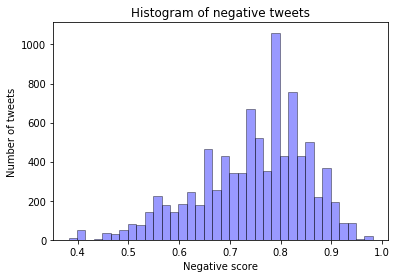

In [72]:
sns.distplot(df_tweets_neg['Neg'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of negative tweets')
plt.xlabel('Negative score')
plt.ylabel('Number of tweets')

In [73]:
# if negative score is lower than 0.65 then the tweet is neutral
df_tweets2['Prediction2'] = df_tweets2.apply(lambda x: 0 if x['Neg']<0.65
                                                        else x['Prediction'],
                                                    axis=1)

In [74]:
df_tweets2.groupby('Prediction2')['Neg'].count()

Prediction2
-1    7531
 0    3793
Name: Neg, dtype: int64

## -- Change predictions based on syriza_xeftiles, ŒùŒî_ŒæŒµœÜœÑŒπŒªŒµœÇ, nd_xeftiles, skai_xeftiles

In [75]:
def check_neg_hashtags(a,b):
    for i in a:
        if i in b:
            return 1
    return 0

negative_hashtags = ['Œ£Œ•Œ°ŒôŒñŒë_ŒæŒµœÜœÑŒπŒªŒµœÇ', 'ŒùŒî_ŒæŒµœÜœÑŒπŒªŒµœÇ', 'Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÉŒ∑_œÑœÉŒπœÅŒ∫Œø', 'ŒùŒî_Œ∏ŒµŒªŒ±œÑŒµ',
                   'ŒùŒî_Œ±œÄŒ±œÑŒµœâŒΩŒµœÇ', 'syriza_xeftiles', 'ŒùŒîŒæŒµœÜœÑŒπŒªŒµœÇ', 'ndxeftiles', 
                     'skai_xeftiles', 'ŒùŒî_mafia', 'œÉœÖœÅŒπŒ∂Œ±_ŒæŒµœÜœÑŒπŒªŒµœÇ']

# if tweet contains one of those hashtags then it is negative
df_tweets2['Prediction3'] = df_tweets2.apply(lambda x: -1 if 
                                check_neg_hashtags(negative_hashtags,x['hashtags'])==1
                                else x['Prediction2'],
                                axis=1)

In [77]:
df_tweets2.groupby('Prediction3')['Neg'].count()

Prediction3
-1    8324
 0    3000
Name: Neg, dtype: int64

## -- Check and fix dates 

In [79]:
print('Tweets from',df_tweets2.date.min(),' until ',df_tweets2.date.max())

Tweets from 2019-09-04 00:00:10  until  2019-09-11 23:52:23


In [80]:
# create a column with only the date and not the time
df_tweets2['date2'] = df_tweets2['date'].dt.date
# create a column with the number of the day starting from 0
start = df_tweets2.date2.min()
df_tweets2['day'] = df_tweets2['date2'].apply(lambda x: (x - start).days)
# the first day should be 1(not 0)...
df_tweets2['day'] = df_tweets2['day'] + 1

In [84]:
# group hashtags based on their meaning
df_tweets2['ŒöœåŒºŒºŒ±'] = df_tweets2['searchParam'].apply(lambda x: 'Œ£Œ•Œ°ŒôŒñŒë' if x in ['#Œ£Œ•Œ°ŒôŒñŒë', '#Œ§œÉŒπœÄœÅŒ±œÇ']
                                                          else 'ŒùŒî' if x in ['#ŒùŒî', '#ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑œÇ']
                                                          else 'ŒìŒïŒùŒôŒöŒë')

In [85]:
# create a column for 'syriza_xeftiles', for 'ŒùŒî_ŒæŒµœÜœÑŒπŒªŒµœÇ' and for both
df_tweets2['syriza_xeftiles'] = df_tweets2['hashtags'].apply(lambda x: 
                                        1 if 'syriza_xeftiles' in x
                                    else 0)

df_tweets2['nd_xeftiles'] = df_tweets2['hashtags'].apply(lambda x: 
                                        1 if ('ŒùŒî_ŒæŒµœÜœÑŒπŒªŒµœÇ' in x) | ('ndxeftiles' in x)
                                    else 0)

df_tweets2['both_xeftiles'] = df_tweets2.apply(lambda x: 
                                    1 if (x['syriza_xeftiles']==1) & (x['nd_xeftiles']==1)
                                    else 0,
                                    axis=1)

In [86]:
df_syr_xeft = df_tweets2[df_tweets2.syriza_xeftiles==1]
print(len(df_syr_xeft))
print(len(df_syr_xeft[df_syr_xeft.Prediction2==-1]))
print(len(df_syr_xeft[df_syr_xeft.Prediction2==0]))

98
15
83


In [87]:
df_tweets_tmp = df_tweets2.copy()
df_tweets_tmp = df_tweets_tmp.drop_duplicates(subset=['id'], keep='first')
df_tweets_tmp['skai_xeftiles'] = df_tweets_tmp.apply(lambda x: 1 if 
                                                       'skai_xeftiles' in x['hashtags']
                                else 0, axis=1)

In [89]:
print(df_tweets_tmp.syriza_xeftiles.sum())
print(df_tweets_tmp.nd_xeftiles.sum())
print(df_tweets_tmp.skai_xeftiles.sum())

66
260
73


In [90]:
df_tweets_tmp.shape

(9571, 21)

In [91]:
df_tweets_tmp.id.nunique()

9571

In [92]:
df_tweets_tmp2 = df_tweets_tmp.groupby(['Prediction3'], as_index=False)['id'].count()
df_tweets_tmp2['Class'] = ['Negative', 'Non-negative']
df_tweets_tmp2['Number of tweets'] = df_tweets_tmp2['id']
df_tweets_tmp2

Prediction3    id         Class  Number of tweets
0 -1            7071  Negative      7071            
1  0            2500  Non-negative  2500

Text(0.5,1,'Number of tweets per class \n 1st May - 21st May')

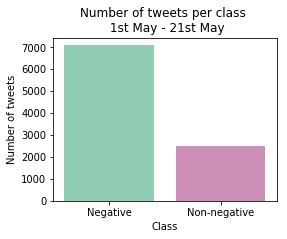

In [93]:
# set size of plot
plt.figure(figsize=(4,3))
# set the colors of the bars
colors = ["#86D7B4",  "#D786BB"]
sns.set_palette(palette=colors)
# create the plot
ax = sns.barplot(x="Class", y="Number of tweets", data=df_tweets_tmp2)

# Add labels
plt.title('Number of tweets per class \n 1st May - 21st May')

#plt.xticks(rotation=50)

In [94]:
df_tweets_tmp.groupby(['searchParam'])['id'].count()

searchParam
#ŒíŒøœÖŒªŒÆ         402 
#ŒúŒ∑œÑœÉŒøœÑŒ¨Œ∫Œ∑œÇ    4358
#ŒùŒî            2425
#Œ£Œ•Œ°ŒôŒñŒë        1630
#Œ∫œÖŒ≤ŒµœÅŒΩŒ∑œÉŒ∑     220 
#œÑœÉŒπœÄœÅŒ±œÇ       536 
Name: id, dtype: int64

In [95]:
df_tweets2.head(2)

date                                               hashtags  \
0 2019-09-08 23:39:53  []                                                      
1 2019-09-08 22:46:36  [ŒùŒî, ŒïœÄŒπœÑŒµŒªŒπŒ∫œå_Œ∫œÅŒ¨œÑŒøœÇ, ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑, ŒîŒïŒò2019, ŒíŒµŒªŒªŒπŒ¥ŒµŒπŒø]   

                    id searchParam  \
0  1170844235215642624  #ŒùŒî          
1  1170830825153318912  #ŒùŒî          

                                                                                                                                                                                                                                                                                                            text  \
0  RT @EliasPalai: Œ†œÅœåŒ∏ŒµœÉŒ∑ Œ®ŒÆœÜŒøœÖ ŒïŒ∏ŒΩŒπŒ∫œéŒΩ ŒïŒ∫ŒªŒøŒ≥œéŒΩ\n\n(ŒöŒ±Œπ Œ∫Œ¨œÑŒøŒπŒ∫ŒøŒπ œÑŒøœÖ ŒïŒæœâœÑŒµœÅŒπŒ∫Œøœç Œ±œÜŒøœç œÄŒªŒ≠ŒøŒΩ œÉœÑŒπœÇ Œ¥Œ∑ŒºŒøœÉŒ∫ŒøœÄŒÆœÉŒµŒπœÇ Œ∏Œ± œÄœÅŒ≠œÄŒµŒπ ŒøŒπ ŒµœÑŒ±ŒπœÅŒØŒµœÇ Œ¥Œ∑ŒºŒøœÉŒ∫ŒøœÄŒÆœÉŒµ‚Ä¶                                                                                                                                                                  
1  Œ§Œø œÑŒµœÅŒºŒ¨œÑŒπœÉŒ±ŒΩ œÉœÑŒ∑ŒΩ "ŒµœÄŒπŒ∫ŒøŒπŒΩœâŒΩŒØŒ±" (Œ∑ œáŒ¨œÅŒ± œÑŒøœÖ PR Œ∑ #ŒùŒî, Œ≠œáŒøœÖŒΩ Œ∫Œ±Œπ Œ≥ŒΩœâœÉœÑŒøœçœÇ ŒºŒµ Œ≥œÅŒ±œÜŒµŒØŒ±...). ŒöŒ±ŒºŒπŒ¨ Œ∫Œ±œÑŒøœÉœÑŒ¨œÅŒπŒ± ŒºœåŒΩŒø Œ¥Œ∑ŒºŒøœÉŒπŒøŒ≥œÅŒ¨œÜŒøœÖœÇ Œ∏Œ± œÄœÅŒøœÉŒªŒ¨Œ≤ŒµŒπ œÑŒø #ŒïœÄŒπœÑŒµŒªŒπŒ∫œå_Œ∫œÅŒ¨œÑŒøœÇ (Œ∫ŒøŒºŒ±ŒΩœÑŒ±œÑŒøœçœÅŒ± #ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑). Œ†ŒÆŒ≥Œ±ŒΩ Œ≥ŒπŒ± interview; ŒüœÄŒøŒπŒøœÇ œáŒµŒπœÅŒøŒ∫œÅŒøœÑŒÆœÉŒµŒπ œÄŒπŒø Œ¥œÖŒΩŒ±œÑŒ¨ œÄœÅŒøœÉŒªŒ±ŒºŒ≤Œ¨ŒΩŒµœÑŒ±Œπ;üòÇ #ŒîŒïŒò2019 #ŒíŒµŒªŒªŒπŒ¥ŒµŒπŒø https://t.co/2duOrmL7u5   

               user_id                user_name  \
0  1162444088500772864  ŒúœÄŒπŒªŒ±œÅŒøœÇ                  
1  1142893644082503681  Œ†Œ±ŒΩŒ±Œ≥ŒπœéœÑŒ∑œÇ ŒßŒ±œÑŒ∂Œ∑œÄŒªŒÆœÇ üá¨üá∑   

                                                                                                                                                                                                                                                                                                                                                                                                                                          Bigrams2  \
0  [RT Œ†Œ°ŒüŒòŒïŒ£Œó, Œ†Œ°ŒüŒòŒïŒ£Œó Œ®ŒóŒ¶ŒüŒ•, Œ®ŒóŒ¶ŒüŒ• ŒïŒòŒùŒôŒöŒ©Œù, ŒïŒòŒùŒôŒöŒ©Œù ŒïŒöŒõŒüŒìŒ©Œù, ŒïŒöŒõŒüŒìŒ©Œù ŒöŒëŒô, ŒöŒëŒô ŒöŒëŒ§ŒüŒôŒöŒüŒô, ŒöŒëŒ§ŒüŒôŒöŒüŒô Œ§ŒüŒ•, Œ§ŒüŒ• ŒïŒûŒ©Œ§ŒïŒ°ŒôŒöŒüŒ•, ŒïŒûŒ©Œ§ŒïŒ°ŒôŒöŒüŒ• ŒëŒ¶ŒüŒ•, ŒëŒ¶ŒüŒ• Œ†ŒõŒïŒüŒù, Œ†ŒõŒïŒüŒù Œ£Œ§ŒôŒ£, Œ£Œ§ŒôŒ£ ŒîŒóŒúŒüŒ£ŒöŒüŒ†ŒóŒ£ŒïŒôŒ£, ŒîŒóŒúŒüŒ£ŒöŒüŒ†ŒóŒ£ŒïŒôŒ£ ŒòŒë, ŒòŒë Œ†Œ°ŒïŒ†ŒïŒô, Œ†Œ°ŒïŒ†ŒïŒô ŒüŒô, ŒüŒô ŒïŒ§ŒëŒôŒ°ŒôŒïŒ£, ŒïŒ§ŒëŒôŒ°ŒôŒïŒ£ ŒîŒóŒúŒüŒ£ŒöŒüŒ†ŒóŒ£Œï]                                                                                                                                                                                      
1  [Œ§Œü Œ§ŒïŒ°ŒúŒëŒ§ŒôŒ£ŒëŒù, Œ§ŒïŒ°ŒúŒëŒ§ŒôŒ£ŒëŒù Œ£Œ§ŒóŒù, Œ£Œ§ŒóŒù ŒïŒ†ŒôŒöŒüŒôŒùŒ©ŒùŒôŒë, ŒïŒ†ŒôŒöŒüŒôŒùŒ©ŒùŒôŒë Œó, Œó ŒßŒëŒ°Œë, ŒßŒëŒ°Œë Œ§ŒüŒ•, Œ§ŒüŒ• PR, PR Œó, Œó ŒïŒßŒüŒ•Œù, ŒïŒßŒüŒ•Œù ŒöŒëŒô, ŒöŒëŒô ŒìŒùŒ©Œ£Œ§ŒüŒ•Œ£, ŒìŒùŒ©Œ£Œ§ŒüŒ•Œ£ ŒúŒï, ŒúŒï ŒìŒ°ŒëŒ¶ŒïŒôŒë, ŒìŒ°ŒëŒ¶ŒïŒôŒë ŒöŒëŒúŒôŒë, ŒöŒëŒúŒôŒë ŒöŒëŒ§ŒüŒ£Œ§ŒëŒ°ŒôŒë, ŒöŒëŒ§ŒüŒ£Œ§ŒëŒ°ŒôŒë ŒúŒüŒùŒü, ŒúŒüŒùŒü ŒîŒóŒúŒüŒ£ŒôŒüŒìŒ°ŒëŒ¶ŒüŒ•Œ£, ŒîŒóŒúŒüŒ£ŒôŒüŒìŒ°ŒëŒ¶ŒüŒ•Œ£ ŒòŒë, ŒòŒë Œ†Œ°ŒüŒ£ŒõŒëŒíŒïŒô, Œ†Œ°ŒüŒ£ŒõŒëŒíŒïŒô Œ§Œü, Œ§Œü ŒöŒüŒúŒëŒùŒ§ŒëŒ§ŒüŒ•Œ°Œë, ŒöŒüŒúŒëŒùŒ§ŒëŒ§ŒüŒ•Œ°Œë Œ†ŒóŒìŒëŒù, Œ†ŒóŒìŒëŒù ŒìŒôŒë, ŒìŒôŒë INTERVIEW, INTERVIEW ŒüŒ†ŒüŒôŒüŒ£, ŒüŒ†ŒüŒôŒüŒ£ ŒßŒïŒôŒ°ŒüŒöŒ°ŒüŒ§ŒóŒ£ŒïŒô, ŒßŒïŒôŒ°ŒüŒöŒ°ŒüŒ§ŒóŒ£ŒïŒô Œ†ŒôŒü, Œ†ŒôŒü ŒîŒ•ŒùŒëŒ§Œë, ŒîŒ•ŒùŒëŒ§Œë Œ†Œ°ŒüŒ£ŒõŒëŒúŒíŒëŒùŒïŒ§ŒëŒô]   

     Neg   Neut    Pos  Prediction  Prediction2  Prediction3       date2  day  \
0  0.790  0.164  0.046 -1          -1           -1            2019-09-08  5     
1  0.748  0.196  0.056 -1          -1           -1            2019-09-08  5     

  ŒöœåŒºŒºŒ±  syriza_xeftiles  nd_xeftiles  both_xeftiles  
0  ŒùŒî    0                0            0        

In [96]:
# save the df with the tweets and the predictions as pickle file
df_tweets2.to_pickle('df_tweets_predictions.pkl')

## - Analysis & Visualization

In [45]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

### - Number of tweets per day during last weeks (all hashtags) 

In [46]:
# the same id may occur more than once because it was found in more than one searchParam
# keep each id only once for the following plot
df_tmp1 = df_tweets2.drop_duplicates(['id'], keep='first')

In [47]:
df_tmp1 = df_tmp1.groupby('day', as_index=False)['id'].count()
df_tmp1['day_text'] = df_tmp1['day'].apply(lambda x: str(x)+'Œ∑')

Text(0,0.5,'Number of tweets')

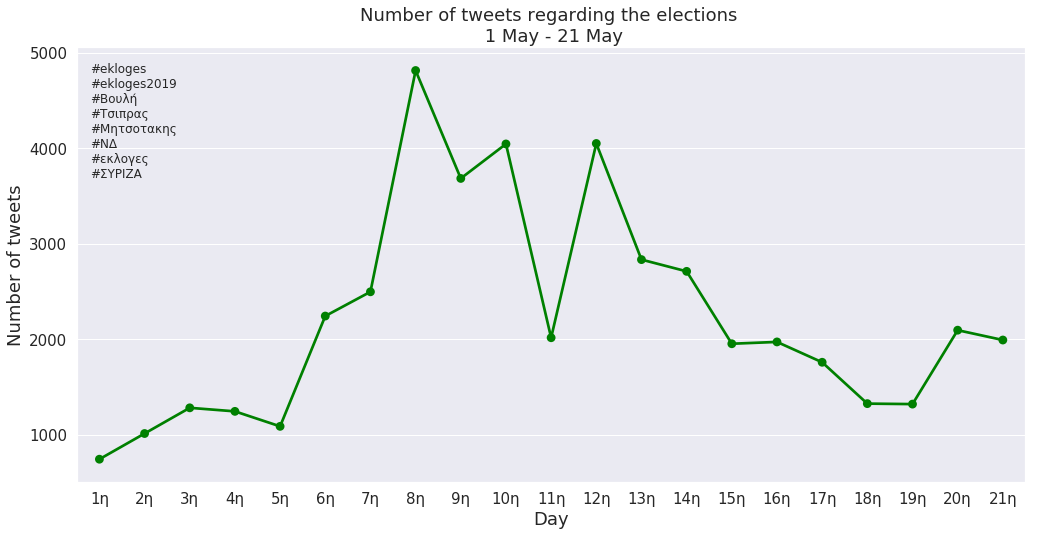

In [49]:
plt.figure(figsize=(17,8))
sns.set_style("darkgrid")
ax = sns.pointplot(x="day_text", y="id",data=df_tmp1, color='green')
#ax = sns.lineplot(x="day", y="id",data=df_tmp1)

# add the texts
plt.text(-0.2, 3700,'\n'.join(df_tweets2.searchParam.unique()), fontsize=12)
# plt.text(-0.5, 950,'Œ†œÅœâœÑŒøŒºŒ±Œ≥ŒπŒ¨', fontsize=12, color='green')
# plt.text(1.3, 1400,'ŒàŒΩœÑŒøŒΩŒ∑ œÉœÖŒ∂ŒÆœÑŒ∑œÉŒ∑ \nŒ≥ŒπŒ± œÑŒ∑ŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ \nœÉœÑŒø ŒúŒ¨œÑŒπ', fontsize=12)
# plt.text(5.1, 2000,'ŒàŒΩœÑŒøŒΩŒ∑ œÉœÖŒ∂ŒÆœÑŒ∑œÉŒ∑ Œ≥ŒπŒ± Œ§œÉŒØœÄœÅŒ± \nŒ∫Œ±Œπ Œ∫œåœÑŒµœÅŒø Œ†Œ±ŒΩŒ±Œ≥œåœÄŒøœÖŒªŒøœÖ', fontsize=12, color='#ca272c')
# plt.text(6.5, 3300,'ŒïŒæŒ±Œ≥Œ≥ŒµŒªŒØŒ± Œ§œÉŒØœÄœÅŒ± \nŒ≥ŒπŒ± Œ∏ŒµœÑŒπŒ∫Œ¨ ŒºŒ≠œÑœÅŒ±', fontsize=12, color='#ca272c')
# plt.text(8, 4130,'Œ®ŒÆœÜŒøœÇ ŒµŒºœÄŒπœÉœÑŒøœÉœçŒΩŒ∑œÇ \nœÉœÑŒ∑ŒΩ Œ∫œÖŒ≤Œ≠ŒΩœÅŒ∑œÉŒ∑', fontsize=12, color='green')
# plt.text(9.4, 1700,'Œ†ŒøœÉŒøœÉœÜŒ±ŒπœÅŒπŒ∫œåœÇ œÑŒµŒªŒπŒ∫œåœÇ \nŒ∫œÖœÄŒ≠ŒªŒªŒøœÖ', fontsize=12, color='green')
# plt.text(10.4, 4130,'ŒëŒΩŒ±œÜŒøœÅŒ¨ ŒúŒ∑œÑœÉŒøœÑŒ¨Œ∫Œ∑ \nœÉŒµ 7ŒÆŒºŒµœÅŒ∑ ŒµœÅŒ≥Œ±œÉŒØŒ±', fontsize=12, color='#0B19CC')

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add labels
plt.title('Number of tweets regarding the elections \n 1 May - 21 May', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of tweets', fontsize=18)

### - Comparison of number of tweets between nd & syriza

In [50]:
# create a df with only these 4 hashtags
hstgs1 = ['#Œ§œÉŒπœÄœÅŒ±œÇ', '#ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑œÇ', '#Œ£Œ•Œ°ŒôŒñŒë', '#ŒùŒî']
df_tmp2 = df_tweets2[df_tweets2.searchParam.isin(hstgs1)]

#### -- Over the time 

In [51]:
df_tmp3 = df_tmp2.groupby(['day','ŒöœåŒºŒºŒ±'], as_index=False)['id'].count()
df_tmp3['day_text'] = df_tmp3['day'].apply(lambda x: str(x)+'Œ∑')

In [52]:
df_tmp3

day   ŒöœåŒºŒºŒ±    id day_text
0   1    ŒùŒî      221   1Œ∑     
1   1    Œ£Œ•Œ°ŒôŒñŒë  571   1Œ∑     
2   2    ŒùŒî      197   2Œ∑     
3   2    Œ£Œ•Œ°ŒôŒñŒë  875   2Œ∑     
4   3    ŒùŒî      344   3Œ∑     
5   3    Œ£Œ•Œ°ŒôŒñŒë  936   3Œ∑     
6   4    ŒùŒî      506   4Œ∑     
7   4    Œ£Œ•Œ°ŒôŒñŒë  1209  4Œ∑     
8   5    ŒùŒî      361   5Œ∑     
9   5    Œ£Œ•Œ°ŒôŒñŒë  996   5Œ∑     
10  6    ŒùŒî      358   6Œ∑     
11  6    Œ£Œ•Œ°ŒôŒñŒë  1989  6Œ∑     
12  7    ŒùŒî      455   7Œ∑     
13  7    Œ£Œ•Œ°ŒôŒñŒë  2431  7Œ∑     
14  8    ŒùŒî      844   8Œ∑     
15  8    Œ£Œ•Œ°ŒôŒñŒë  2224  8Œ∑     
16  9    ŒùŒî      702   9Œ∑     
17  9    Œ£Œ•Œ°ŒôŒñŒë  1529  9Œ∑     
18  10   ŒùŒî      906   10Œ∑    
19  10   Œ£Œ•Œ°ŒôŒñŒë  1754  10Œ∑    
20  11   ŒùŒî      436   11Œ∑    
21  11   Œ£Œ•Œ°ŒôŒñŒë  1558  11Œ∑    
22  12   ŒùŒî      3029  12Œ∑    
23  12   Œ£Œ•Œ°ŒôŒñŒë  1584  12Œ∑    
24  13   ŒùŒî      1507  13Œ∑    
25  13   Œ£Œ•Œ°ŒôŒñŒë  1537  13Œ∑    
26  14   ŒùŒî      1103  14Œ∑    
27  14   Œ£Œ•Œ°ŒôŒñŒë  1585  14Œ∑    
28  15   ŒùŒî      690   15Œ∑    
29  15   Œ£Œ•Œ°ŒôŒñŒë  1151  15Œ∑    
30  16   ŒùŒî      670   16Œ∑    
31  16   Œ£Œ•Œ°ŒôŒñŒë  1141  16Œ∑    
32  17   ŒùŒî      446   17Œ∑    
33  17   Œ£Œ•Œ°ŒôŒñŒë  1346  17Œ∑    
34  18   ŒùŒî      356   18Œ∑    
35  18   Œ£Œ•Œ°ŒôŒñŒë  1025  18Œ∑    
36  19   ŒùŒî      432   19Œ∑    
37  19   Œ£Œ•Œ°ŒôŒñŒë  906   19Œ∑    
38  20   ŒùŒî      593   20Œ∑    
39  20   Œ£Œ•Œ°ŒôŒñŒë  1552  20Œ∑    
40  21   ŒùŒî      544   21Œ∑    
41  21   Œ£Œ•Œ°ŒôŒñŒë  1021  21Œ∑

Text(0,0.5,'Number of tweets')

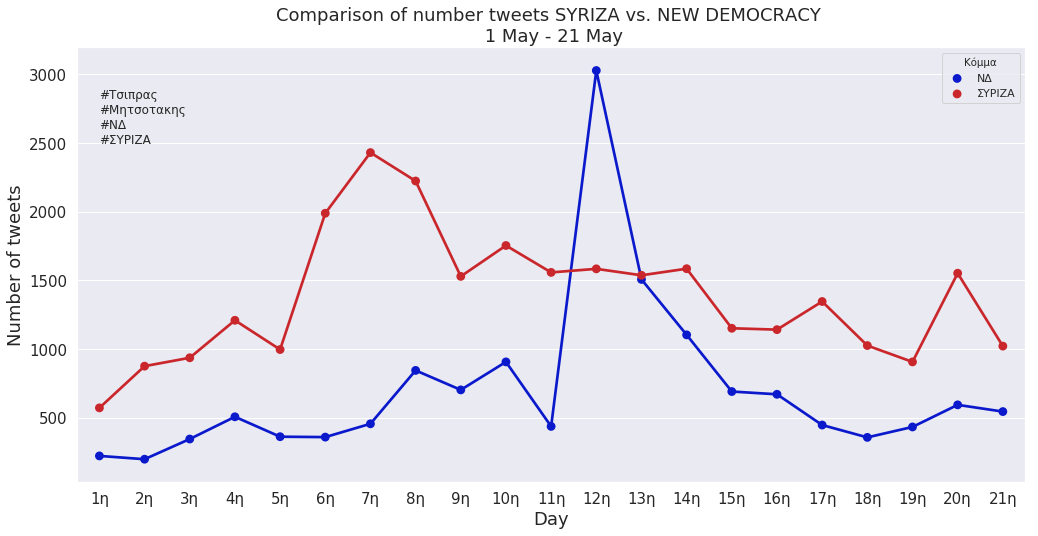

In [53]:
# set size of plot
plt.figure(figsize=(17,8))
# set the colors of the lines
colors = ["#0B19CC", "#ca272c"]
sns.set_palette(palette=colors)
# create the plot
#ax = sns.lineplot(x="day", y="id", hue="ŒöœåŒºŒºŒ±", data=df_tmp3)
ax = sns.pointplot(x="day_text", y="id", hue="ŒöœåŒºŒºŒ±", data=df_tmp3)

# resize axis 
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# add the texts
plt.text(0, 2500,'\n'.join(df_tmp2.searchParam.unique()), fontsize=12)
# plt.text(-0.5, 300,'Œ†œÅœâœÑŒøŒºŒ±Œ≥ŒπŒ¨', fontsize=12, color='green')
# plt.text(1.3, 500,'ŒàŒΩœÑŒøŒΩŒ∑ œÉœÖŒ∂ŒÆœÑŒ∑œÉŒ∑ \nŒ≥ŒπŒ± œÑŒ∑ŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ \nœÉœÑŒø ŒúŒ¨œÑŒπ', fontsize=12)
# plt.text(5.1, 1700,'ŒàŒΩœÑŒøŒΩŒ∑ œÉœÖŒ∂ŒÆœÑŒ∑œÉŒ∑ Œ≥ŒπŒ± Œ§œÉŒØœÄœÅŒ± \nŒ∫Œ±Œπ Œ∫œåœÑŒµœÅŒø Œ†Œ±ŒΩŒ±Œ≥œåœÄŒøœÖŒªŒøœÖ', fontsize=12, color='#ca272c')
# plt.text(6.5, 2400,'ŒïŒæŒ±Œ≥Œ≥ŒµŒªŒØŒ± Œ§œÉŒØœÄœÅŒ± \nŒ≥ŒπŒ± Œ∏ŒµœÑŒπŒ∫Œ¨ ŒºŒ≠œÑœÅŒ±', fontsize=12, color='#ca272c')
# plt.text(8, 1800,'Œ®ŒÆœÜŒøœÇ ŒµŒºœÄŒπœÉœÑŒøœÉœçŒΩŒ∑œÇ \nœÉœÑŒ∑ŒΩ Œ∫œÖŒ≤Œ≠ŒΩœÅŒ∑œÉŒ∑', fontsize=12, color='green')
# #plt.text(9.4, 1700,'Œ†ŒøœÉŒøœÉœÜŒ±ŒπœÅŒπŒ∫œåœÇ œÑŒµŒªŒπŒ∫œåœÇ \nŒ∫œÖœÄŒ≠ŒªŒªŒøœÖ', fontsize=12, color='green')
# plt.text(8.7, 2900,'ŒëŒΩŒ±œÜŒøœÅŒ¨ ŒúŒ∑œÑœÉŒøœÑŒ¨Œ∫Œ∑ \nœÉŒµ 7ŒÆŒºŒµœÅŒ∑ ŒµœÅŒ≥Œ±œÉŒØŒ±', fontsize=12, color='#0B19CC')

# Add labels
plt.title('Comparison of number tweets SYRIZA vs. NEW DEMOCRACY \n 1 May - 21 May', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of tweets', fontsize=18)

#### -- The same as the above but for separate hashtags

In [42]:
# df_tmp3b = df_tmp2.groupby(['day','searchParam'], as_index=False)['id'].count()
# df_tmp3b['day_text'] = df_tmp3b['day'].apply(lambda x: str(x)+'Œ∑')

# # set size of plot
# plt.figure(figsize=(17,8))
# # set the colors of the lines
# #colors = ["#0B19CC", "#D474DA", ]
# colors = ["#0B19CC", "#74A0DA", "#ca272c", "#D786BB"]
# sns.set_palette(palette=colors)
# # create the plot
# ax = sns.lineplot(x="day_text", y="id", hue="searchParam", data=df_tmp3b)

# # add the texts
# #plt.text(1, 2500,'\n'.join(df_tmp2.searchParam.unique()), fontsize=12)

# ax.tick_params(axis='x', labelsize=15)
# ax.tick_params(axis='y', labelsize=15)

# # Add labels
# plt.title('Œ£œçŒ≥Œ∫œÅŒπœÉŒ∑ Œ±œÅŒπŒ∏ŒºŒøœç tweets Œ£Œ•Œ°ŒôŒñŒë vs ŒùŒïŒë ŒîŒóŒúŒüŒöŒ°ŒëŒ§ŒôŒë \n 1 ŒúŒ±œäŒøœÖ - 15 ŒúŒ±œäŒøœÖ', fontsize=18)
# plt.xlabel('ŒúŒ≠œÅŒ±', fontsize=18)
# plt.ylabel('ŒëœÅŒπŒ∏ŒºœåœÇ tweets', fontsize=18)

#### --- All time

In [54]:
df_tmp4 = df_tmp2.groupby(['ŒöœåŒºŒºŒ±','searchParam'], as_index=False)['id'].count()
df_tmp4.columns = ['ŒöœåŒºŒºŒ±', 'Hashtag', 'ŒëœÅŒπŒ∏ŒºœåœÇ tweets']
df_tmp4

ŒöœåŒºŒºŒ±      Hashtag  ŒëœÅŒπŒ∏ŒºœåœÇ tweets
0  ŒùŒî      #ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑œÇ  9587          
1  ŒùŒî      #ŒùŒî          5113          
2  Œ£Œ•Œ°ŒôŒñŒë  #Œ£Œ•Œ°ŒôŒñŒë      15018         
3  Œ£Œ•Œ°ŒôŒñŒë  #Œ§œÉŒπœÄœÅŒ±œÇ     13902

In [55]:
logo_nd = plt.imread('images/nd_logo.jpg')
mitsotakis = plt.imread('images/mitsotakis.png')
logo_syriza = plt.imread('images/syriza_logo.jpg')
tsipras = plt.imread('images/tsipras.jpg')

Text(0,0.5,'Number of tweets')

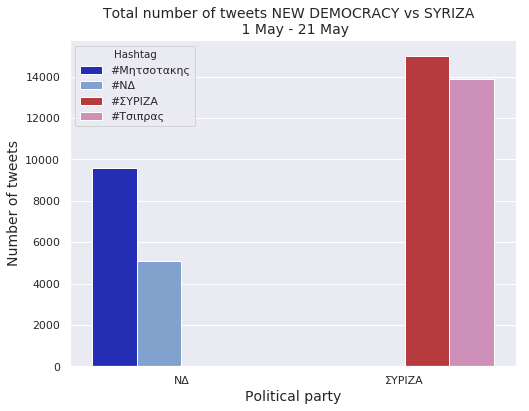

In [58]:
# set size of plot
plt.figure(figsize=(8,6))
# set the colors of the bars
colors = ["#0B19CC", "#74A0DA", "#ca272c", "#D786BB"]
sns.set_palette(palette=colors)
# create the plot
ax = sns.barplot(x="ŒöœåŒºŒºŒ±", y="ŒëœÅŒπŒ∏ŒºœåœÇ tweets", hue="Hashtag", data=df_tmp4)

#ax.align='left'

# add images
# ax.figure.figimage(logo_nd, 142, 110, zorder=1)
# ax.figure.figimage(mitsotakis, 97, 220, zorder=1)
# ax.figure.figimage(logo_syriza, 410, 297, zorder=1)
# ax.figure.figimage(tsipras, 455, 314, zorder=1)

# # remove axis
# ax.axes.get_xaxis().set_ticks([])
# # add axes manually
# plt.text(-1, -1,'ŒùŒî', fontsize=12, color='blue')
# #plt.text(-0.2, 950,'Œ†œÅœâœÑŒøŒºŒ±Œ≥ŒπŒ¨', fontsize=12, color='green')

# Add labels
plt.title('Total number of tweets NEW DEMOCRACY vs SYRIZA  \n 1 May - 21 May', fontsize=14)
plt.xlabel('Political party', fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)

### - Overall negativity of all hashtags ‚Äì horizontal boxplot

In [59]:
df_tmp5 = df_tweets2.copy()
# merge those hashtags '#ŒµŒ∫ŒªŒøŒ≥ŒµœÇ', '#ekloges2019', '#ekloges' to a common
df_tmp5['searchParam'] = df_tmp5['searchParam'].apply(lambda x: 
                        '#ŒµŒ∫ŒªŒøŒ≥ŒµœÇ' if x in ['#ŒµŒ∫ŒªŒøŒ≥ŒµœÇ', '#ekloges2019', '#ekloges']
                                else x)

df_tmp5 = df_tmp5.groupby(['searchParam', 'Prediction3'], as_index=False)['id'].count()

df_tmp5 = df_tmp5.groupby('searchParam')['id'].apply(list)

df_tmp5 = pd.DataFrame({'Hashtag':df_tmp5.index, 'Numbers':df_tmp5.values})
df_tmp5['Neg_Perc'] = df_tmp5['Numbers'].apply(lambda x: 100*(x[0]/(x[0]+x[1])))
df_tmp5 = df_tmp5.sort_values(by=['Neg_Perc'], ascending=False)
df_tmp5.columns = ['Hashtag', 'Numbers', 'Œ†ŒøœÉŒøœÉœÑœå Œ±œÅŒΩŒ∑œÑŒπŒ∫œéŒΩ tweets']
df_tmp5

Hashtag        Numbers  Œ†ŒøœÉŒøœÉœÑœå Œ±œÅŒΩŒ∑œÑŒπŒ∫œéŒΩ tweets
3  #Œ£Œ•Œ°ŒôŒñŒë      [11811, 3207]  78.645625               
1  #ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑œÇ  [7312, 2275]   76.269949               
0  #ŒíŒøœÖŒªŒÆ       [8470, 2680]   75.964126               
4  #Œ§œÉŒπœÄœÅŒ±œÇ     [9979, 3923]   71.781039               
2  #ŒùŒî          [3459, 1654]   67.651085               
5  #ŒµŒ∫ŒªŒøŒ≥ŒµœÇ     [1880, 1916]   49.525817

#### -- For all hashtags 

In [60]:
ekloges = plt.imread('images/ekloges.jpg')
vouli = plt.imread('images/vouli.jpg')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

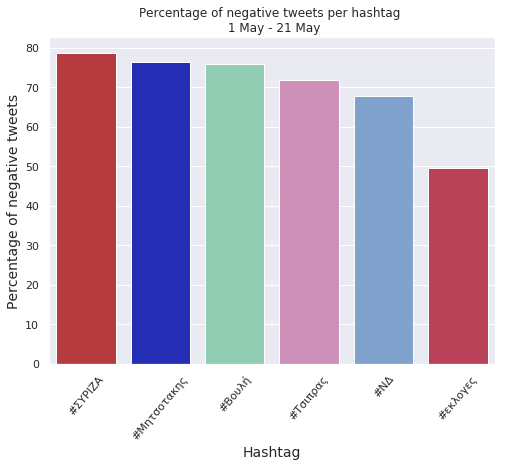

In [62]:
# set size of plot
plt.figure(figsize=(8,6))
# set the colors of the bars
colors = ["#ca272c", '#0B19CC', "#86D7B4",  "#D786BB",
          "#74A0DA", '#CD2E4D', '#CBCD2E', '#3F0773']
sns.set_palette(palette=colors)
# create the plot
ax = sns.barplot(x="Hashtag", y="Œ†ŒøœÉŒøœÉœÑœå Œ±œÅŒΩŒ∑œÑŒπŒ∫œéŒΩ tweets", data=df_tmp5)

# # add images
# ax.figure.figimage(logo_nd, 365, 330, zorder=1)
# ax.figure.figimage(mitsotakis, 144, 360, zorder=1)
# ax.figure.figimage(logo_syriza, 70, 370, zorder=1)
# ax.figure.figimage(tsipras, 293, 340, zorder=1)
# ax.figure.figimage(ekloges, 440, 260, zorder=1)
# ax.figure.figimage(vouli, 215, 358, zorder=1)

# Add labels
plt.title('Percentage of negative tweets per hashtag \n 1 May - 21 May')
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Percentage of negative tweets', fontsize=14)
plt.xticks(rotation=50)

#### -- For nd vs syriza

In [63]:
df_tmp6 = df_tmp5[df_tmp5.Hashtag.isin(hstgs1)]
# group hashtags based on their meaning
df_tmp6['ŒöœåŒºŒºŒ±'] = df_tmp6['Hashtag'].apply(lambda x: 'Œ£Œ•Œ°ŒôŒñŒë' if x in ['#Œ£Œ•Œ°ŒôŒñŒë', '#Œ§œÉŒπœÄœÅŒ±œÇ']
                                                          else 'ŒùŒî' if x in ['#ŒùŒî', '#ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑œÇ']
                                                          else 'ŒìŒïŒùŒôŒöŒë')
df_tmp6 = df_tmp6.sort_values(by=['ŒöœåŒºŒºŒ±'])
df_tmp6

/home/infilab/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Hashtag        Numbers  Œ†ŒøœÉŒøœÉœÑœå Œ±œÅŒΩŒ∑œÑŒπŒ∫œéŒΩ tweets   ŒöœåŒºŒºŒ±
1  #ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑œÇ  [7312, 2275]   76.269949                 ŒùŒî    
2  #ŒùŒî          [3459, 1654]   67.651085                 ŒùŒî    
3  #Œ£Œ•Œ°ŒôŒñŒë      [11811, 3207]  78.645625                 Œ£Œ•Œ°ŒôŒñŒë
4  #Œ§œÉŒπœÄœÅŒ±œÇ     [9979, 3923]   71.781039                 Œ£Œ•Œ°ŒôŒñŒë

Text(0,0.5,'Percentage of negative tweets')

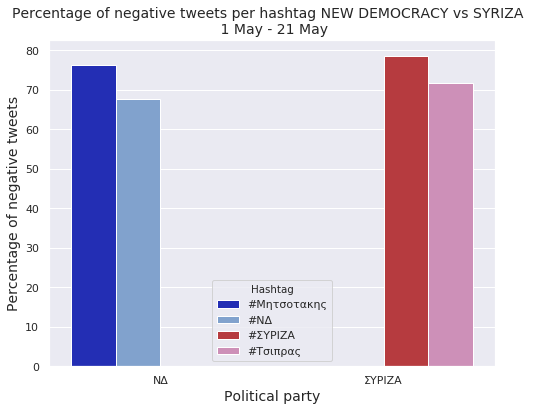

In [66]:
# set size of plot
plt.figure(figsize=(8,6))
# set the colors of the bars
colors = ["#0B19CC", "#74A0DA", "#ca272c", "#D786BB"]
sns.set_palette(palette=colors)
      
# create the plot
ax = sns.barplot(x="ŒöœåŒºŒºŒ±", y="Œ†ŒøœÉŒøœÉœÑœå Œ±œÅŒΩŒ∑œÑŒπŒ∫œéŒΩ tweets", hue="Hashtag", data=df_tmp6)

# Add labels
plt.title('Percentage of negative tweets per hashtag NEW DEMOCRACY vs SYRIZA  \n 1 May - 21 May', fontsize=14)
plt.xlabel('Political party', fontsize=14)
plt.ylabel('Percentage of negative tweets', fontsize=14)

# # add images
# ax.figure.figimage(logo_nd, 122, 271, zorder=1)
# ax.figure.figimage(mitsotakis, 77, 303, zorder=1)
# ax.figure.figimage(logo_syriza, 390, 316, zorder=1)
# ax.figure.figimage(tsipras, 435, 285, zorder=1)

#### -- Negativity of tweets over time for nd & syriza hashtags 

In [67]:
# keep only rows with hashtags of syriza and nd
df_tmp7 = df_tweets2[df_tweets2.ŒöœåŒºŒºŒ±.isin(['Œ£Œ•Œ°ŒôŒñŒë', 'ŒùŒî'])]
# group the tweets by day, Œ∫ŒøŒºŒºŒ± and prediction
df_tmp8 = df_tmp7.groupby(['day','ŒöœåŒºŒºŒ±', 'Prediction3'], as_index=False)['id'].count()

# convert number of tweets to list [negatives, neutrals+positives]
df_tmp9 = df_tmp8.groupby(['day', 'ŒöœåŒºŒºŒ±'])['id'].apply(list)

# convert the above series to dataframe
df_tmp9=pd.DataFrame(df_tmp9)
# reset the index
df_tmp9.reset_index(inplace=True)
df_tmp9['day_text'] = df_tmp9['day'].apply(lambda x: str(x)+'Œ∑')
# calculate the percentage of negative tweets for each day and each political party
df_tmp9['Neg_Perc'] = df_tmp9['id'].apply(lambda x: 100*(x[0]/(x[0]+x[1])))
df_tmp9

day   ŒöœåŒºŒºŒ±           id day_text   Neg_Perc
0   1    ŒùŒî      [155, 66]    1Œ∑       70.135747
1   1    Œ£Œ•Œ°ŒôŒñŒë  [454, 117]   1Œ∑       79.509632
2   2    ŒùŒî      [109, 88]    2Œ∑       55.329949
3   2    Œ£Œ•Œ°ŒôŒñŒë  [631, 244]   2Œ∑       72.114286
4   3    ŒùŒî      [264, 80]    3Œ∑       76.744186
5   3    Œ£Œ•Œ°ŒôŒñŒë  [696, 240]   3Œ∑       74.358974
6   4    ŒùŒî      [390, 116]   4Œ∑       77.075099
7   4    Œ£Œ•Œ°ŒôŒñŒë  [1068, 141]  4Œ∑       88.337469
8   5    ŒùŒî      [280, 81]    5Œ∑       77.562327
9   5    Œ£Œ•Œ°ŒôŒñŒë  [874, 122]   5Œ∑       87.751004
10  6    ŒùŒî      [208, 150]   6Œ∑       58.100559
11  6    Œ£Œ•Œ°ŒôŒñŒë  [1521, 468]  6Œ∑       76.470588
12  7    ŒùŒî      [315, 140]   7Œ∑       69.230769
13  7    Œ£Œ•Œ°ŒôŒñŒë  [1815, 616]  7Œ∑       74.660633
14  8    ŒùŒî      [614, 230]   8Œ∑       72.748815
15  8    Œ£Œ•Œ°ŒôŒñŒë  [1680, 544]  8Œ∑       75.539568
16  9    ŒùŒî      [515, 187]   9Œ∑       73.361823
17  9    Œ£Œ•Œ°ŒôŒñŒë  [1140, 389]  9Œ∑       74.558535
18  10   ŒùŒî      [634, 272]   10Œ∑      69.977925
19  10   Œ£Œ•Œ°ŒôŒñŒë  [1377, 377]  10Œ∑      78.506271
20  11   ŒùŒî      [337, 99]    11Œ∑      77.293578
21  11   Œ£Œ•Œ°ŒôŒñŒë  [1157, 401]  11Œ∑      74.261874
22  12   ŒùŒî      [2525, 504]  12Œ∑      83.360845
23  12   Œ£Œ•Œ°ŒôŒñŒë  [1264, 320]  12Œ∑      79.797980
24  13   ŒùŒî      [1179, 328]  13Œ∑      78.234904
25  13   Œ£Œ•Œ°ŒôŒñŒë  [1256, 281]  13Œ∑      81.717632
26  14   ŒùŒî      [872, 231]   14Œ∑      79.057117
27  14   Œ£Œ•Œ°ŒôŒñŒë  [1204, 381]  14Œ∑      75.962145
28  15   ŒùŒî      [383, 307]   15Œ∑      55.507246
29  15   Œ£Œ•Œ°ŒôŒñŒë  [801, 350]   15Œ∑      69.591659
30  16   ŒùŒî      [480, 190]   16Œ∑      71.641791
31  16   Œ£Œ•Œ°ŒôŒñŒë  [742, 399]   16Œ∑      65.030675
32  17   ŒùŒî      [268, 178]   17Œ∑      60.089686
33  17   Œ£Œ•Œ°ŒôŒñŒë  [987, 359]   17Œ∑      73.328380
34  18   ŒùŒî      [248, 108]   18Œ∑      69.662921
35  18   Œ£Œ•Œ°ŒôŒñŒë  [784, 241]   18Œ∑      76.487805
36  19   ŒùŒî      [276, 156]   19Œ∑      63.888889
37  19   Œ£Œ•Œ°ŒôŒñŒë  [637, 269]   19Œ∑      70.309051
38  20   ŒùŒî      [383, 210]   20Œ∑      64.586847
39  20   Œ£Œ•Œ°ŒôŒñŒë  [1006, 546]  20Œ∑      64.819588
40  21   ŒùŒî      [336, 208]   21Œ∑      61.764706
41  21   Œ£Œ•Œ°ŒôŒñŒë  [696, 325]   21Œ∑      68.168462

Text(0,0.5,'Percentage of negative tweets')

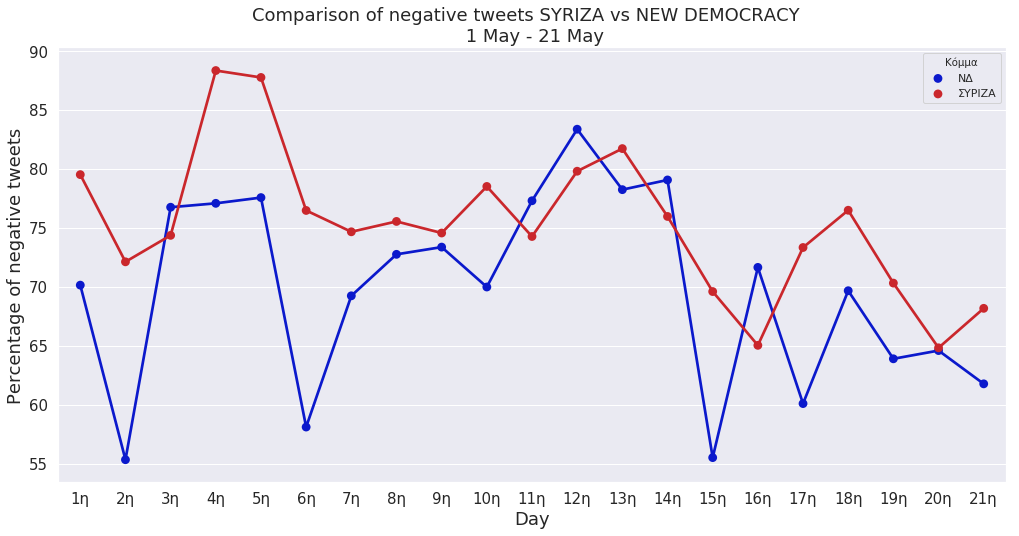

In [90]:
# set size of plot
plt.figure(figsize=(17,8))
# set the colors of the lines
colors = ["#0B19CC", "#ca272c"]
sns.set_palette(palette=colors)
# create the plot
#ax = sns.lineplot(x="day", y="Neg_Perc", hue="ŒöœåŒºŒºŒ±", data=df_tmp9)
#pointplot
ax = sns.pointplot(x="day_text", y="Neg_Perc", hue="ŒöœåŒºŒºŒ±", data=df_tmp9)

# # add the texts
# plt.text(1.3, 78,'ŒàŒΩœÑŒøŒΩŒ∑ œÉœÖŒ∂ŒÆœÑŒ∑œÉŒ∑ \nŒ≥ŒπŒ± œÑŒ∑ŒΩ œÄœÖœÅŒ∫Œ±Œ≥ŒπŒ¨ \nœÉœÑŒø ŒúŒ¨œÑŒπ', fontsize=12)
# plt.text(5.1, 83,'ŒàŒΩœÑŒøŒΩŒ∑ œÉœÖŒ∂ŒÆœÑŒ∑œÉŒ∑ Œ≥ŒπŒ± Œ§œÉŒØœÄœÅŒ± \nŒ∫Œ±Œπ Œ∫œåœÑŒµœÅŒø Œ†Œ±ŒΩŒ±Œ≥œåœÄŒøœÖŒªŒøœÖ', fontsize=12, color='#ca272c')
# plt.text(6.5, 77,'ŒïŒæŒ±Œ≥Œ≥ŒµŒªŒØŒ± Œ§œÉŒØœÄœÅŒ± \nŒ≥ŒπŒ± Œ∏ŒµœÑŒπŒ∫Œ¨ ŒºŒ≠œÑœÅŒ±', fontsize=12, color='#ca272c')
# plt.text(8, 80,'Œ®ŒÆœÜŒøœÇ ŒµŒºœÄŒπœÉœÑŒøœÉœçŒΩŒ∑œÇ \nœÉœÑŒ∑ŒΩ Œ∫œÖŒ≤Œ≠ŒΩœÅŒ∑œÉŒ∑', fontsize=12, color='green')
# plt.text(9.4, 85,'ŒëŒΩŒ±œÜŒøœÅŒ¨ ŒúŒ∑œÑœÉŒøœÑŒ¨Œ∫Œ∑ \nœÉŒµ 7ŒÆŒºŒµœÅŒ∑ ŒµœÅŒ≥Œ±œÉŒØŒ±', fontsize=12, color='#0B19CC')

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add labels
plt.title('Comparison of negative tweets SYRIZA vs NEW DEMOCRACY  \n 1 May - 21 May', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Percentage of negative tweets', fontsize=18)

### - Analysis of twitter users

Œ£œÑŒ± Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ± tweets Œ≥ŒπŒ± œÉœÖœÅŒπŒ∂Œ± Œ∫Œ±Œπ ŒùŒî : Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ≥œÅŒ¨œÜŒµŒπ œÄ.œá. 3.1 tweets
Œ£œÑŒøŒΩ œÉœÖœÅŒπŒ∂Œ± Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ≥œÅŒ¨œÜŒµŒπ œÄ.œá. 2 tweets ŒµŒΩœé œÉœÑŒøŒΩ ŒùŒî Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ≥œÅŒ¨œÜŒµŒπ œÄ.œá. 1.2 tweets
ŒëœÅŒ± œÉœÑŒøŒΩ œÉœÖœÅŒπŒ∂Œ± œÖœÄŒ±œÅœáŒøœÖŒΩ œÖœÄŒ±œÅœáŒøœÖŒΩ œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒµŒΩŒøŒπ œáœÅŒ∑œÉœÑŒµœÇ œÄŒøœÖ Œ≥œÅŒ±œÜŒøœÖŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ± œÉœÖœáŒΩŒ±.



œÄ.œá Œ§Œø 60% œÑœâŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫œâŒΩ tweets Œ≥ŒπŒ± ŒùŒî œÑŒø ŒµœáŒøœÖŒΩ Œ≥œÅŒ±œàŒµŒπ œÑŒø 20% œÑœâŒΩ œáœÅŒ∑œÉœÑœéŒΩ

In [70]:
# drop tweets of the first 3 days because I don't have user_ids
df_tweets3 = df_tweets2[df_tweets2.user_id!=111]

# keep only tweets of nd and syriza
df_tweets3 = df_tweets3[df_tweets3.ŒöœåŒºŒºŒ±.isin(['Œ£Œ•Œ°ŒôŒñŒë', 'ŒùŒî'])]

In [71]:
df_tweets3.shape

(40476, 19)

In [72]:
df_tweets3.id.nunique()

33262

In [73]:
df_tweets3.user_id.nunique()

5834

In [74]:
df_tweets3.groupby(['user_id'], as_index=False)['id'].count().sort_values(by=['id'], ascending=False).head()

user_id   id
3068  2831100747          539
2658  2190423604          432
3868  4328654057          422
851   250058740           382
4980  972148515798470656  277

In [75]:
# keep only negative tweets
df_tmp10 = df_tweets3[df_tweets3.Prediction3==-1]

##### --- Œ£Œ•Œ°ŒôŒñŒë & ŒùŒî together

ŒïŒ¥œâ Œ≠œáœâ Œ∫œÅŒ±œÑŒÆœÉŒµŒπ ŒºœåŒΩŒø unique tweets(ids) Œ≥ŒπŒ±œÑŒØ ŒµŒΩŒ± tweet Œ±œÄŒø œÑŒøŒΩ ŒπŒ¥ŒπŒø œáœÅŒ∑œÉœÑŒ∑ ŒºœÄŒøœÅŒµŒπ ŒΩŒ± œÖœÄŒÆœÅœáŒµ 4 œÜŒøœÅŒ≠œÇ ŒµœÄŒµŒπŒ¥Œ∑ Œ≤œÅŒµŒ∏Œ∑Œ∫Œµ Œ∫Œ±Œπ Œ≥ŒπŒ± œÑŒ± 4 hashtags '#Œ§œÉŒπœÄœÅŒ±œÇ', '#ŒúŒ∑œÑœÉŒøœÑŒ±Œ∫Œ∑œÇ', '#Œ£Œ•Œ°ŒôŒñŒë', '#ŒùŒî'. ŒïŒΩœâ ŒµŒ≥œé Œ∏ŒµŒªœâ ŒºœåŒΩŒø ŒºŒπŒ± œÜŒøœÅŒ± œÑŒø Œ∫Œ±Œ∏Œµ tweets.

In [76]:
# keep each tweet only once because there are tweets found in more than one searchparam
df_tmp10b = df_tmp10.drop_duplicates(subset=['id'], keep='first')
#df_tmp11 = df_tmp10b.groupby(['user_id', 'ŒöœåŒºŒºŒ±'], as_index=False)['id'].count().sort_values(by=['user_id','ŒöœåŒºŒºŒ±'], ascending=False)
df_tmp11 = df_tmp10b.groupby(['user_id'], as_index=False)['id'].count().sort_values(by=['id'], ascending=False)
df_tmp11.head()

user_id   id
2666  2831100747          329
740   250058740           283
2307  2190423604          274
332   86044761            206
4345  972148515798470656  162

In [77]:
print('-',df_tmp11.user_id.nunique(), 'œáœÅŒÆœÉœÑŒµœÇ Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ±ŒΩ œÉœÖŒΩŒøŒªŒπŒ∫Œ¨', df_tmp11.id.sum(), 'Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.')
mean_tweets = round(df_tmp11.id.sum()/df_tmp11.user_id.nunique(),1)
print('- ŒöŒ±œÑŒ¨ ŒºŒ≠œÉŒø œåœÅŒø Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπŒµœçŒµŒπ',mean_tweets, 'Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.')

- 5102 œáœÅŒÆœÉœÑŒµœÇ Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ±ŒΩ œÉœÖŒΩŒøŒªŒπŒ∫Œ¨ 24591 Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.
- ŒöŒ±œÑŒ¨ ŒºŒ≠œÉŒø œåœÅŒø Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπŒµœçŒµŒπ 4.8 Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.


##### --- Œ£Œ•Œ°ŒôŒñŒë

ŒïŒ¥œâ Œ∫œÅŒ±œÑŒ¨œâ œÑŒø Œ∫Œ¨Œ∏Œµ tweet œÑŒøœÖ œáœÅŒÆœÉœÑŒ∑ ŒµœâœÇ Œ∫Œ±Œπ 2 œÜŒøœÅŒ≠œÇ Œ±ŒΩŒ¨ŒªŒøŒ≥Œ± œÉŒµ œÄœåœÉŒ± Œ±œÄŒø œÑŒ± 2 Œ∫ŒøŒºŒºŒ±œÑŒ± Œ±ŒΩŒ±œÜŒ≠œÅŒµœÑŒ±Œπ. ŒàœÑœÉŒπ Œ¥ŒµŒΩ Œ∏Œ± Œµœáœâ œÑŒø ŒπŒ¥ŒπŒø tweets Œ∫Œ±Œπ Œ≥ŒπŒ± œÑŒ± 2 hashtag ŒµŒΩŒøœÇ Œ∫ŒøŒºŒºŒ±œÑŒøœÇ. ŒüœÄœåœÑŒµ, ŒºŒµœÑŒ¨ Œ∫Œ¨ŒΩœâ œÜŒπŒªœÑœÅŒ±œÅŒπœÉŒºŒ± Œ≥ŒπŒ± œÑŒø Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒºŒ±. 

In [78]:
df_tmp10c = df_tmp10.drop_duplicates(subset=['id', 'ŒöœåŒºŒºŒ±'], keep='first')
df_tmp11b = df_tmp10c.groupby(['user_id', 'ŒöœåŒºŒºŒ±'], as_index=False)['id'].count().sort_values(by=['user_id','ŒöœåŒºŒºŒ±'], ascending=False)
df_tmp11b.head()

user_id   ŒöœåŒºŒºŒ±  id
6719  1130447586681335808  Œ£Œ•Œ°ŒôŒñŒë  1 
6718  1130417345304891392  Œ£Œ•Œ°ŒôŒñŒë  10
6717  1130417345304891392  ŒùŒî      1 
6716  1130407985052831745  Œ£Œ•Œ°ŒôŒñŒë  1 
6715  1130407985052831745  ŒùŒî      3

In [79]:
df_tmp12 = df_tmp11b[df_tmp11b.ŒöœåŒºŒºŒ±=='Œ£Œ•Œ°ŒôŒñŒë']
print('-',df_tmp12.user_id.nunique(), 'œáœÅŒÆœÉœÑŒµœÇ Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ±ŒΩ œÉœÖŒΩŒøŒªŒπŒ∫Œ¨', df_tmp12.id.sum(), 'Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.')
mean_tweets = round(df_tmp12.id.sum()/df_tmp12.user_id.nunique(),1)
print('- ŒöŒ±œÑŒ¨ ŒºŒ≠œÉŒø œåœÅŒø Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπŒµœçŒµŒπ',mean_tweets, 'Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.')

- 3864 œáœÅŒÆœÉœÑŒµœÇ Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ±ŒΩ œÉœÖŒΩŒøŒªŒπŒ∫Œ¨ 16630 Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.
- ŒöŒ±œÑŒ¨ ŒºŒ≠œÉŒø œåœÅŒø Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπŒµœçŒµŒπ 4.3 Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.


##### --- ŒùŒî

In [80]:
df_tmp13 = df_tmp11b[df_tmp11b.ŒöœåŒºŒºŒ±=='ŒùŒî']
print('-',df_tmp13.user_id.nunique(), 'œáœÅŒÆœÉœÑŒµœÇ Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ±ŒΩ œÉœÖŒΩŒøŒªŒπŒ∫Œ¨', df_tmp13.id.sum(), 'Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.')
mean_tweets = round(df_tmp13.id.sum()/df_tmp13.user_id.nunique(),1)
print('- ŒöŒ±œÑŒ¨ ŒºŒ≠œÉŒø œåœÅŒø Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπŒµœçŒµŒπ',mean_tweets, 'Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.')

- 2856 œáœÅŒÆœÉœÑŒµœÇ Œ¥Œ∑ŒºŒøœÉŒØŒµœÖœÉŒ±ŒΩ œÉœÖŒΩŒøŒªŒπŒ∫Œ¨ 9863 Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.
- ŒöŒ±œÑŒ¨ ŒºŒ≠œÉŒø œåœÅŒø Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ Œ¥Œ∑ŒºŒøœÉŒπŒµœçŒµŒπ 3.5 Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ tweets.


In [82]:
# pareto for ND
df_tmp13 = df_tmp13.sort_values(by=['id'], ascending=False)
df_tmp13['Perc_tweets'] = 100*(df_tmp13['id'].cumsum() / df_tmp13['id'].sum())
df_tmp13['Perc_users'] = [100*(i+1)/df_tmp13.user_id.nunique() for i in range(df_tmp13.user_id.nunique())]
#df_tmp13

In [83]:
# pareto for SYRIZA
df_tmp12 = df_tmp12.sort_values(by=['id'], ascending=False)
df_tmp12['Perc_tweets'] = 100*(df_tmp12['id'].cumsum() / df_tmp12['id'].sum())
df_tmp12['Perc_users'] = [100*(i+1)/df_tmp12.user_id.nunique() for i in range(df_tmp12.user_id.nunique())]
#df_tmp12

In [84]:
df_tmp13.head(2)

user_id ŒöœåŒºŒºŒ±   id  Perc_tweets  Perc_users
3462  2831100747          ŒùŒî    236  2.392781     0.035014  
5715  972148515798470656  ŒùŒî    133  3.741255     0.070028

In [85]:
df_tmp12.head(2)

user_id   ŒöœåŒºŒºŒ±   id  Perc_tweets  Perc_users
2990  2190423604  Œ£Œ•Œ°ŒôŒñŒë  267  1.605532     0.02588   
951   250058740   Œ£Œ•Œ°ŒôŒñŒë  197  2.790138     0.05176

In [87]:
def pareto_graph(dataframe1,dataframe2,  x='Perc_users', y='Perc_tweets',
                 xlab = 'Percentage of users', ylab = 'Percentage of tweets',
                 title='Ratio of the percentage of users and negative tweets \nNEW DEMOCRACY vs SYRIZA', 
                 pareto_lim=[20, 80]):
    
    colors = ["#0B19CC", "#ca272c"]
    
    plt.figure(figsize=(12,6))
    line_chart1 = plt.plot(dataframe1[x], dataframe1[y],colors[1])
    line_chart2 = plt.plot(dataframe2[x], dataframe2[y],colors[0])
    
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel(xlab)

    pareto = pareto_lim

    plt.plot((pareto[0], pareto[0]), (0, min(dataframe1.loc[dataframe1[x] >= pareto[0], y])), 'ok--')
    plt.plot((0, pareto[0]), (min(dataframe1.loc[dataframe1[x] >= pareto[0], y]), 
                           min(dataframe1.loc[dataframe1[x] >= pareto[0], y])), 'ok--',
                         color=colors[1])

    plt.text(pareto[0]+1, min(dataframe1.loc[dataframe1[x] >= pareto[0], y])/2, 
                 'The '+ str(pareto[0]) + '% of users \npuplished the ' + \
                 str(int(min(dataframe1.loc[dataframe1[x] >= pareto[0], y]))) + 
             '% of the negative tweets', fontsize=12, color=colors[1])

    plt.plot((pareto[0], pareto[0]), (0, min(dataframe2.loc[dataframe2[x] >= pareto[0], y])), 'ok--')
    plt.plot((0, pareto[0]), (min(dataframe2.loc[dataframe2[x] >= pareto[0], y]), 
                           min(dataframe2.loc[dataframe2[x] >= pareto[0], y])), 'ok--',
                         color=colors[0])

    plt.text(pareto[0]+1, 14+min(dataframe2.loc[dataframe2[x] >= pareto[0], y])/2, 
                 'The '+ str(pareto[0]) + '% of users \npuplished the ' + \
                 str(int(min(dataframe2.loc[dataframe2[x] >= pareto[0], y]))) + 
             '% of the negative tweets', fontsize=12, color=colors[0])
    
    plt.show()

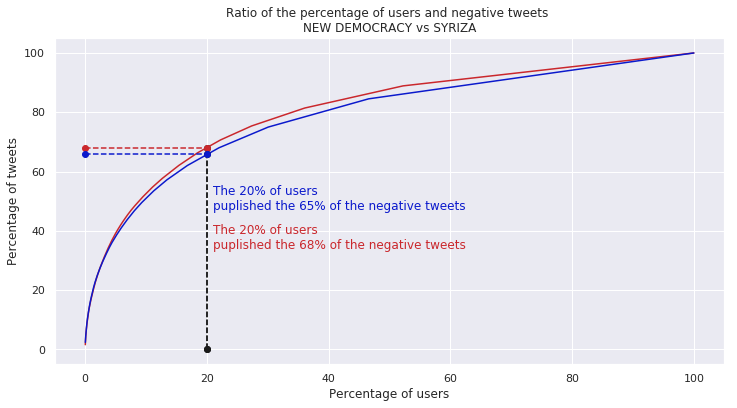

In [88]:
pareto_graph(df_tmp12, df_tmp13)

Text(0.5,1,'Negative tweets per user')

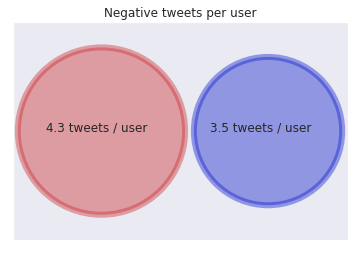

In [89]:
# create data
x = [0.35, 0.92]
y = [0.6, 0.6]
z = [28000, 22000]
 
colors = ["#ca272c", "#0B19CC"]
a = plt.scatter(x, y, s=z*4000, alpha=0.4, linewidth=6, color=colors)

# add the texts
plt.text(0.16, 0.6,'4.3 tweets / user', fontsize=12)
plt.text(0.72, 0.6,'3.5 tweets / user', fontsize=12) 

# remove axis
a.axes.get_xaxis().set_ticks([])
a.axes.get_yaxis().set_ticks([])
#a.set_facecolor("w")
# Add titles (main and on axis)
plt.title("Negative tweets per user")